In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/HousingPrice/HousingPriceCleaned/profiled_data.csv')
data.head(10)

,Price,Post Code,City,District,County
0,283334,LS8 3LF,LEEDS,LEEDS,WEST YORKSHIRE
1,202500,WF4 2QE,WAKEFIELD,WAKEFIELD,WEST YORKSHIRE
2,78000,WF13 2NE,DEWSBURY,KIRKLEES,WEST YORKSHIRE
3,660000,LS7 4JT,LEEDS,LEEDS,WEST YORKSHIRE
4,135000,WF12 0BW,DEWSBURY,KIRKLEES,WEST YORKSHIRE
5,110400,LS29 8TB,ILKLEY,BRADFORD,WEST YORKSHIRE
6,103000,BD16 4LQ,BINGLEY,BRADFORD,WEST YORKSHIRE
7,650000,LS16 8BT,LEEDS,LEEDS,WEST YORKSHIRE
8,115000,WF6 1EJ,NORMANTON,WAKEFIELD,WEST YORKSHIRE
9,65000,BD10 8AQ,BRADFORD,BRADFORD,WEST YORKSHIRE


In [3]:
data_yorkshire_22 =  data[data['County'].str.contains('Yorkshire', case=False)]
data_oxfordshire_22 = data[data['County'].str.contains('Oxfordshire', case=False)]
data_yorkshire_22.head(10)

,Price,Post Code,City,District,County
0,283334,LS8 3LF,LEEDS,LEEDS,WEST YORKSHIRE
1,202500,WF4 2QE,WAKEFIELD,WAKEFIELD,WEST YORKSHIRE
2,78000,WF13 2NE,DEWSBURY,KIRKLEES,WEST YORKSHIRE
3,660000,LS7 4JT,LEEDS,LEEDS,WEST YORKSHIRE
4,135000,WF12 0BW,DEWSBURY,KIRKLEES,WEST YORKSHIRE
5,110400,LS29 8TB,ILKLEY,BRADFORD,WEST YORKSHIRE
6,103000,BD16 4LQ,BINGLEY,BRADFORD,WEST YORKSHIRE
7,650000,LS16 8BT,LEEDS,LEEDS,WEST YORKSHIRE
8,115000,WF6 1EJ,NORMANTON,WAKEFIELD,WEST YORKSHIRE
9,65000,BD10 8AQ,BRADFORD,BRADFORD,WEST YORKSHIRE


/var/folders/gx/nb4lbx_x39q8jmdpw0hfl6sh0000gn/T/ipykernel_14464/1147299271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yorkshire_22['Price'] = remove_outliers(data_yorkshire_22['Price'])


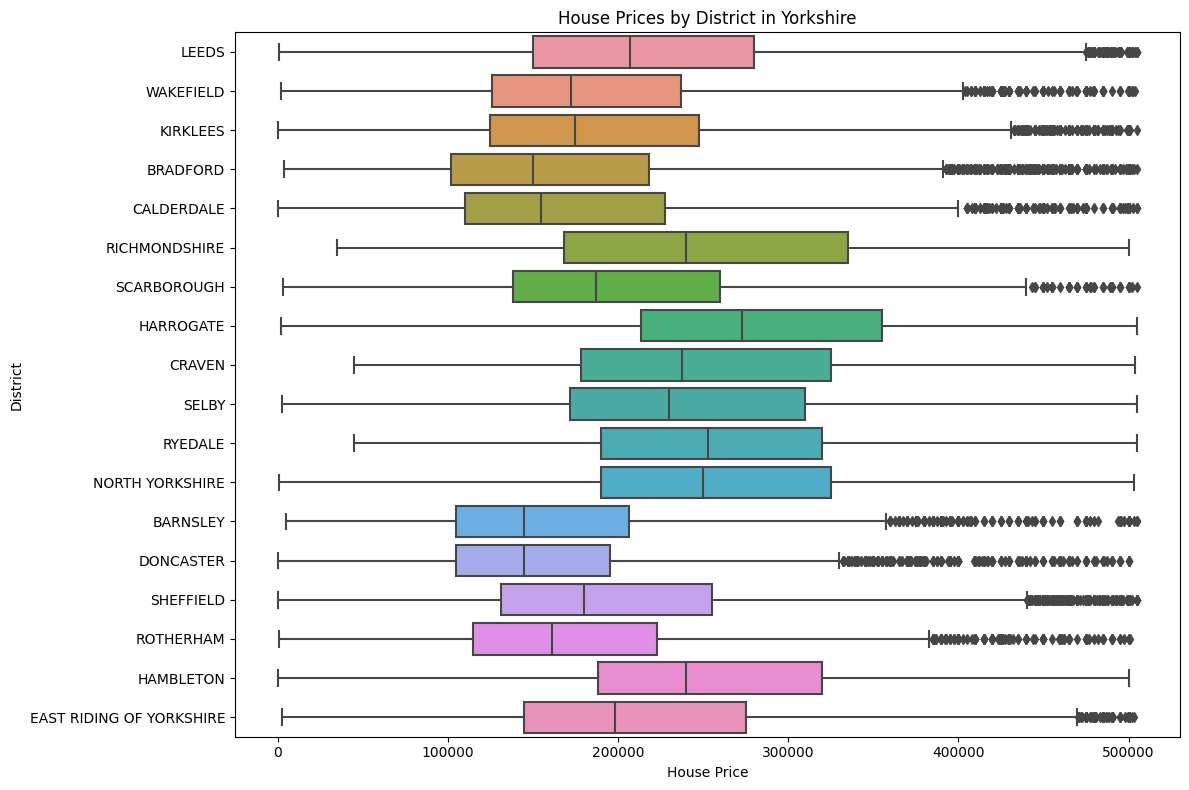

In [4]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

data_yorkshire_22['Price'] = remove_outliers(data_yorkshire_22['Price'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_yorkshire_22, y='District', x='Price', orient='h')
plt.xlabel('House Price')
plt.ylabel('District')
plt.title('House Prices by District in Yorkshire')
plt.tight_layout()
plt.show()

/var/folders/gx/nb4lbx_x39q8jmdpw0hfl6sh0000gn/T/ipykernel_14464/3461738415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_oxfordshire_22['Price'] = remove_outliers(data_oxfordshire_22['Price'])


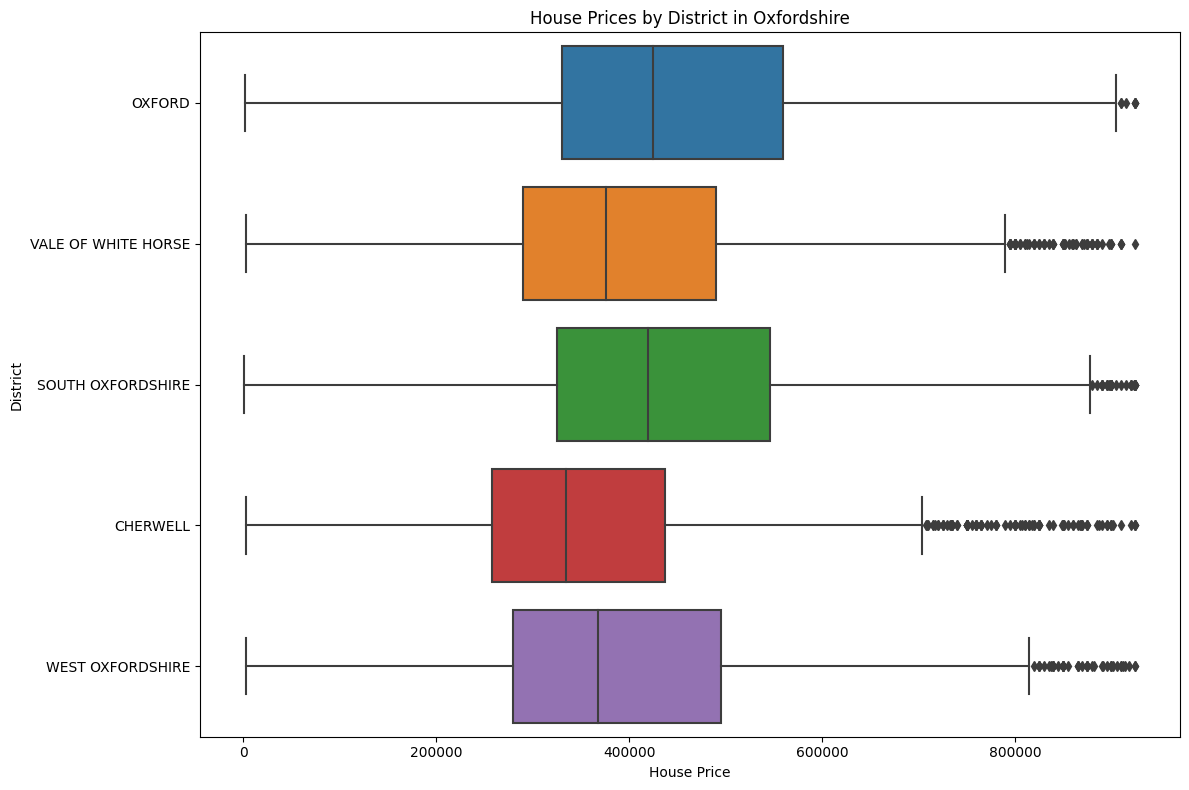

In [5]:

def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

data_oxfordshire_22['Price'] = remove_outliers(data_oxfordshire_22['Price'])
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_oxfordshire_22, y='District', x='Price', orient='h')
plt.xlabel('House Price')
plt.ylabel('District')
plt.title('House Prices by District in Oxfordshire')
plt.tight_layout()
plt.show()

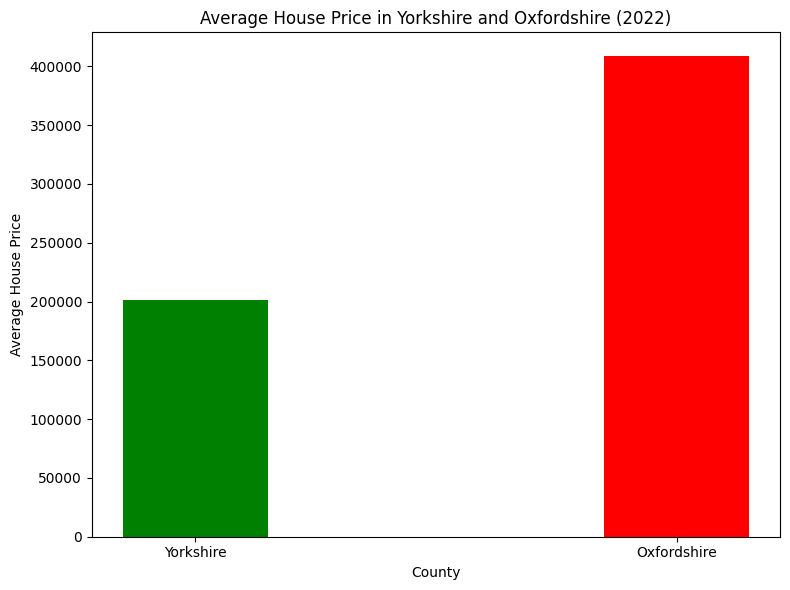

In [6]:
data_filtered_by_county = data[data['County'].str.contains('Yorkshire|Oxfordshire', case=False)]

county_mapping = {
    'oxfordshire': 'Oxfordshire',
    'east riding of yorkshire': 'Yorkshire',
    'west yorkshire':'Yorkshire',
    'south yorkshire' : 'Yorkshire',
    'north yorkshire' : 'Yorkshire'
}

# data_filtered_by_county['County'] = data_filtered_by_county['County'].str.lower().map(county_mapping).fillna(data_filtered_by_county['County'])
# average_prices = data_filtered_by_county.groupby('County')['Price'].mean()
# print(average_prices)
# colors = ['green' if 'oxfordshire' in county.lower() else 'red' for county in average_prices.index]

# plt.figure(figsize=(8, 6))
# average_prices.plot(kind='bar',color=colors)
# plt.xlabel('County')
# plt.ylabel('Average House Price')
# plt.title('Average House Price by County')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()
average_price_yorkshire_22 = data_yorkshire_22['Price'].mean()
average_price_oxfordshire_22 = data_oxfordshire_22['Price'].mean()
counties = ['Yorkshire', 'Oxfordshire']
average_prices = [average_price_yorkshire_22, average_price_oxfordshire_22]

bar_width = 0.3  # Adjust the bar width
x_positions = [0, 1]  # Adjust the positions of the bars

plt.figure(figsize=(8, 6))
plt.bar(x_positions, average_prices, color=['green', 'red'], width=bar_width, align='center')
plt.xlabel('County')
plt.ylabel('Average House Price')
plt.title('Average House Price in Yorkshire and Oxfordshire (2022)')

# Customize the x-axis tick positions and labels
plt.xticks(x_positions, counties)

plt.tight_layout()
plt.show()

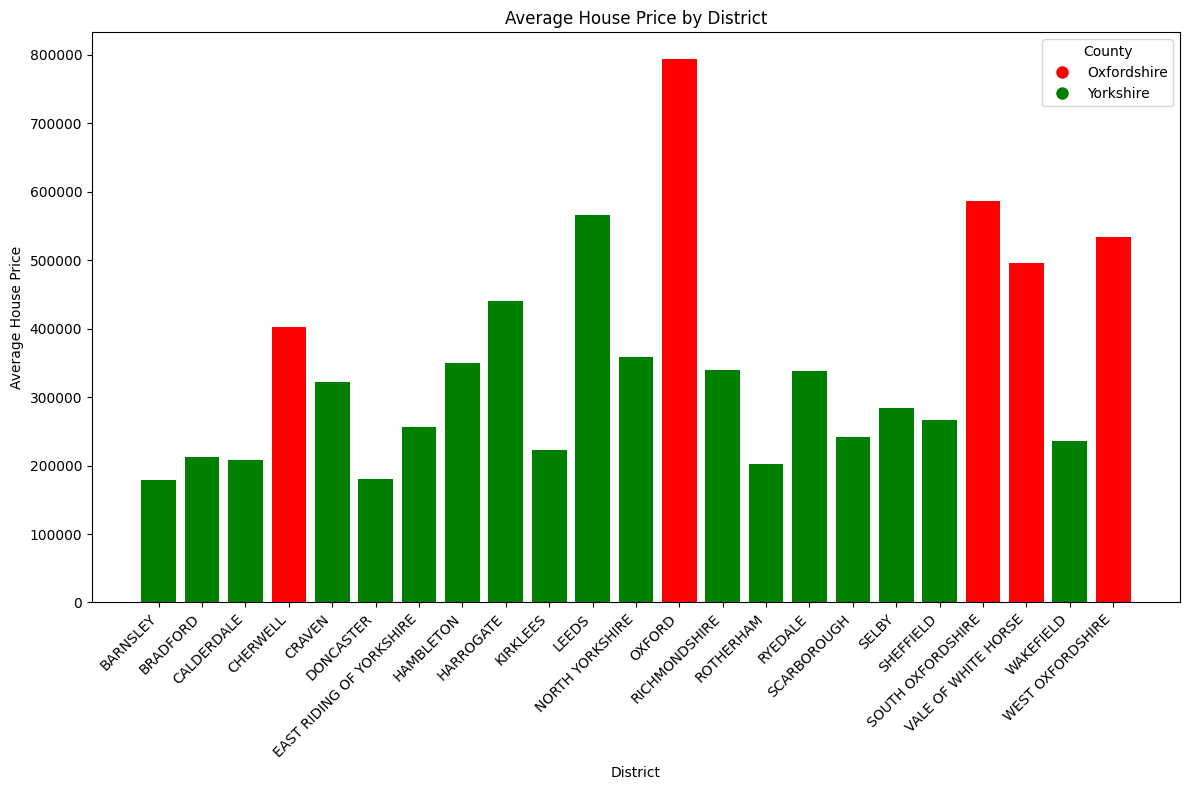

In [7]:
average_prices = data_filtered_by_county.groupby('District')['Price'].mean()
county_mapping = {
    'oxfordshire': 'Oxfordshire',
    'east riding of yorkshire': 'Yorkshire',
    'west yorkshire':'Yorkshire',
    'south yorkshire' : 'Yorkshire',
    'north yorkshire' : 'Yorkshire'
}
data_filtered_by_county['County'] = data_filtered_by_county['County'].str.lower().map(county_mapping).fillna(data_filtered_by_county['County'])

# Create a mapping of district to county
district_to_county = data_filtered_by_county.groupby('District')['County'].first().to_dict()

# Create a list of colors based on the counties
colors_custom = ['red' if county == 'Oxfordshire' else 'green' for county in district_to_county.values()]

# Create the bar plot for Average House Price by District
plt.figure(figsize=(12, 8))
bars = plt.bar(district_to_county.keys(), average_prices.values, color=colors_custom)
plt.xlabel('District')
plt.ylabel('Average House Price')
plt.title('Average House Price by District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

legend_labels = ['Oxfordshire', 'Yorkshire']
legend_colors = ['red', 'green']
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_patches, title='County')

plt.show()

In [8]:
data_21 = pd.read_csv('data/HousingPrice/HousingPriceCleaned/profiled_data_2021.csv')
data_yorkshire_21 =  data_21[data_21['County'].str.contains('Yorkshire', case=False)]
data_oxfordshire_21 = data_21[data_21['County'].str.contains('Oxfordshire', case=False)]

In [9]:
data_20 = pd.read_csv('data/HousingPrice/HousingPriceCleaned/profiled_data_2020.csv')
data_yorkshire_20 =  data_20[data_20['County'].str.contains('Yorkshire', case=False)]
data_oxfordshire_20 = data_20[data_20['County'].str.contains('Oxfordshire', case=False)]

In [10]:
data_19 = pd.read_csv('data/HousingPrice/HousingPriceCleaned/profiled_data_2019.csv')
data_yorkshire_19 =  data_19[data_19['County'].str.contains('Yorkshire', case=False)]
data_oxfordshire_19 = data_19[data_19['County'].str.contains('Oxfordshire', case=False)]



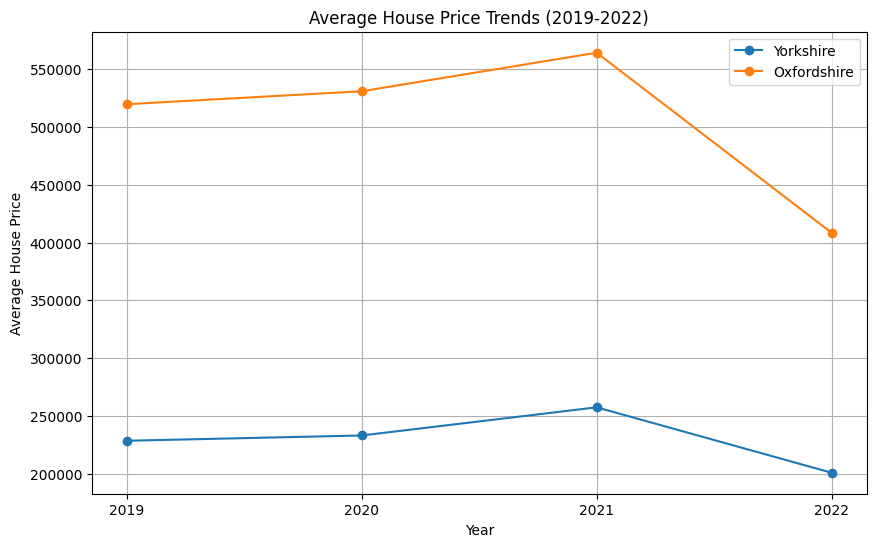

In [11]:
average_prices_yorkshire = {
    2019: data_yorkshire_19['Price'].mean(),
    2020: data_yorkshire_20['Price'].mean(),
    2021: data_yorkshire_21['Price'].mean(),
    2022: data_yorkshire_22['Price'].mean()
}

average_prices_oxfordshire = {
    2019: data_oxfordshire_19['Price'].mean(),
    2020: data_oxfordshire_20['Price'].mean(),
    2021: data_oxfordshire_21['Price'].mean(),
    2022: data_oxfordshire_22['Price'].mean()
}

plt.figure(figsize=(10, 6))
plt.plot(average_prices_yorkshire.keys(), average_prices_yorkshire.values(), marker='o', label='Yorkshire')
plt.plot(average_prices_oxfordshire.keys(), average_prices_oxfordshire.values(), marker='o', label='Oxfordshire')

plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.title('Average House Price Trends (2019-2022)')
plt.xticks(list(average_prices_yorkshire.keys()))
plt.legend()
plt.grid(True)
plt.show()